In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
coordinates

[(-86.54872867949099, 9.725755683077068),
 (-46.205966473270415, -40.245653395192534),
 (-64.70015657626364, 73.17442589902012),
 (-1.6752828248507399, 54.41597197159285),
 (-30.870753120393346, -163.75059241939087),
 (-5.281116012752136, -111.16539618246017),
 (61.87535350141383, 146.90892847358663),
 (26.64483252412525, 39.5903350911091),
 (-77.91476518071889, 174.1133582301597),
 (-13.124338844984592, 84.05350824403689),
 (-1.871364263357023, -146.84215934789344),
 (-81.66368669165432, -179.71419079611843),
 (59.03490585401744, 64.7906643383943),
 (-21.783134107809573, -51.5783741989936),
 (64.26970201858663, -26.919841554719483),
 (26.80975806040756, 61.18219398395516),
 (13.596602591070877, 130.55316522496645),
 (-14.426970664370643, -145.00483632601492),
 (21.95331794651291, 166.27149421822895),
 (-69.08002291388382, -172.26790428191148),
 (76.7936859026745, 158.87306185148708),
 (29.32617486280995, 135.1285564922096),
 (-1.5469856918372216, 124.57785329261924),
 (22.607891453880

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city ount to confirm sufficient count.
len(cities)

606

In [6]:
#Import the datetime module from the datetime library.
from datetime import datetime

#Import the Requests Library
import requests

#Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?"

#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
# Create an endpoint URL for a city.
query_url = url + "appid=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the loggin.
print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = query_url + "&q=" + cities[i] + "&units=imperial"
    city_url
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
         # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
         # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | saint-philippe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | victoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | avarua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | kadykchan
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 2 | baherden
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | barrow
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | bambous virieux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | goderich
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | athens
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | jamestown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | tabiauea
City not found. Skipping...
-----------------------------
Data Retrieval Comple

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 3 | pevek
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | provideniya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | kingaroy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | voh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | villazon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | meulaboh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | margate
-----------------------------
Data Retrieval Complete      
-----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 4 | neryungri
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | pisco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | santa cruz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | sungurlare
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | gisborne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | port hedland
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | port macquarie
-----------------------------
Data Retrieval Complete      
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | hailar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | tilichiki
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | namie
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | venado tuerto
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | abengourou
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | volzhskiy
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 7 | halalo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | ilanskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | buta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | hargeysa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | salug
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | alekseyevsk
-----------------------------
Data Retrieval Complete      


-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 8 | mestia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 8 | abu kamal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | alim
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | ponte nova
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | porto novo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | charters towers
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | kahului
-----------------------------
Data Retrieval Complete      
------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 9 | syamzha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 9 | kalmunai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | vidisha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | kununurra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | sitka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | puerto ayacucho
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | hambantota
-----------------------------
Data Retrieval Complete      
------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 10 | santiago del estero
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | arlit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | lewistown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | kaeo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | dauphin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | chimbote
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | san carlos de bariloche
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 12 | lima
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | cidreira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | zhuhai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | zhuanghe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | safaga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | tateyama
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | rio gallegos
-----------------------------
Data Retrieval Complete      
-----------------------

In [9]:
len(city_data)

561

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,59.94,61,0,6.46,ZA,2021-06-05 17:58:52
1,Chuy,-33.6971,-53.4616,63.12,97,100,9.64,UY,2021-06-05 17:58:53
2,Saint-Philippe,-21.3585,55.7679,72.95,83,41,3.78,RE,2021-06-05 17:58:54
3,Victoria,22.2855,114.1577,82.33,77,51,1.01,HK,2021-06-05 17:54:54
4,Avarua,-21.2078,-159.7750,73.45,83,75,9.22,CK,2021-06-05 17:58:55
5,Puerto Ayora,-0.7393,-90.3518,82.36,83,94,8.99,EC,2021-06-05 17:58:56
6,Umm Lajj,25.0213,37.2685,83.71,53,0,11.68,SA,2021-06-05 17:58:58
7,Bluff,-46.6000,168.3333,46.38,75,81,7.40,NZ,2021-06-05 17:58:58
8,Hithadhoo,-0.6000,73.0833,82.85,75,100,12.37,MV,2021-06-05 17:58:59
9,Atuona,-9.8000,-139.0333,79.12,73,85,14.74,PF,2021-06-05 17:59:00


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-06-05 17:58:52,-34.4187,19.2345,59.94,61,0,6.46
1,Chuy,UY,2021-06-05 17:58:53,-33.6971,-53.4616,63.12,97,100,9.64
2,Saint-Philippe,RE,2021-06-05 17:58:54,-21.3585,55.7679,72.95,83,41,3.78
3,Victoria,HK,2021-06-05 17:54:54,22.2855,114.1577,82.33,77,51,1.01
4,Avarua,CK,2021-06-05 17:58:55,-21.2078,-159.7750,73.45,83,75,9.22
5,Puerto Ayora,EC,2021-06-05 17:58:56,-0.7393,-90.3518,82.36,83,94,8.99
6,Umm Lajj,SA,2021-06-05 17:58:58,25.0213,37.2685,83.71,53,0,11.68
7,Bluff,NZ,2021-06-05 17:58:58,-46.6000,168.3333,46.38,75,81,7.40
8,Hithadhoo,MV,2021-06-05 17:58:59,-0.6000,73.0833,82.85,75,100,12.37
9,Atuona,PF,2021-06-05 17:59:00,-9.8000,-139.0333,79.12,73,85,14.74


In [12]:
#Create the output file(CSV)
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
cloudiness

0        0
1      100
2       41
3       51
4       75
      ... 
556     68
557     98
558     80
559      0
560     46
Name: Cloudiness, Length: 561, dtype: int64

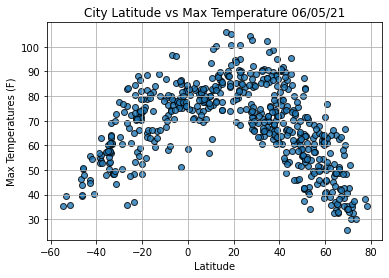

In [14]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperaturs
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperatures (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig1.png")

#Show Plot
plt.show()

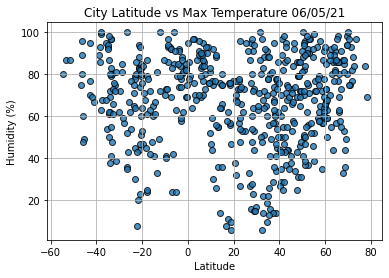

In [15]:
#Build the scatter plot for latitude vs. max temperaturs
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig2.png")

#Show Plot
plt.show()

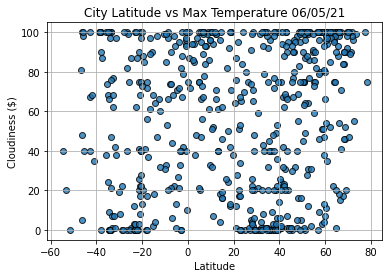

In [16]:
#Build the scatter plot for latitude vs. max temperaturs
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness ($)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig3.png")

#Show Plot
plt.show()

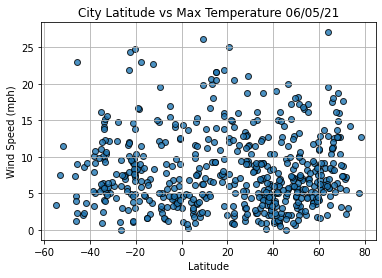

In [17]:
#Build the scatter plot for latitude vs. max temperaturs
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha = 0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save Figure
plt.savefig("weather_data/Fig4.png")

#Show Plot
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)
    print(p_value)

In [35]:
index13 = city_data_df.loc[13]
index13

City                     Olafsvik
Country                        IS
Date          2021-06-05 17:56:26
Lat                       64.8945
Lng                      -23.7142
Max Temp                    48.67
Humidity                       87
Cloudiness                    100
Wind Speed                   4.61
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
556    False
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Victoria,HK,2021-06-05 17:54:54,22.2855,114.1577,82.33,77,51,1.01
6,Umm Lajj,SA,2021-06-05 17:58:58,25.0213,37.2685,83.71,53,0,11.68
11,Tabory,RU,2021-06-05 17:59:01,58.5198,64.5495,60.80,57,51,8.10
13,Olafsvik,IS,2021-06-05 17:56:26,64.8945,-23.7142,48.67,87,100,4.61
14,Iranshahr,IR,2021-06-05 17:59:04,27.2025,60.6848,104.34,27,10,4.61


In [38]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <=0]

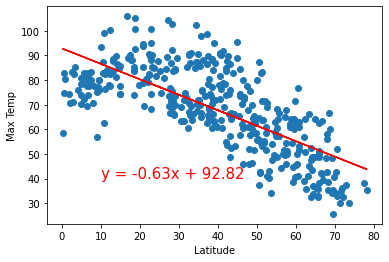

-0.7158849236559087
4.893761153995387e-62


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


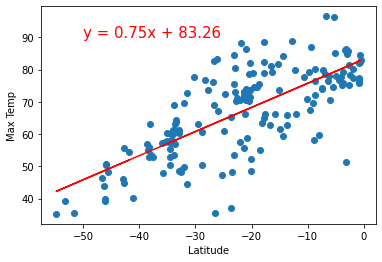

0.7323966428214583
1.601811963644113e-30


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

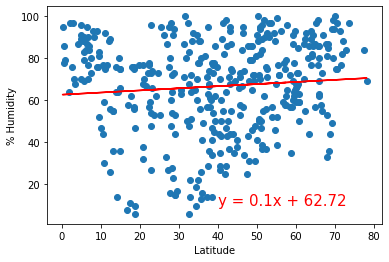

0.08821418099753645
0.0830701185626469


In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

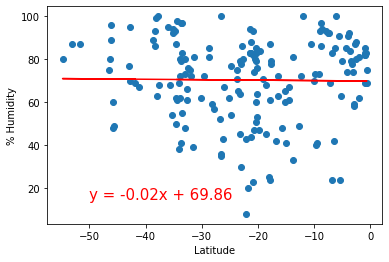

-0.013860626599464089
0.855955421998448


In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

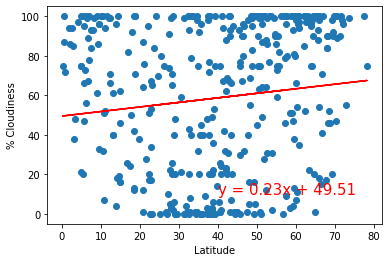

0.12015264316151476
0.018049210735369033


In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % cloudiness', '% Cloudiness',(40,10))

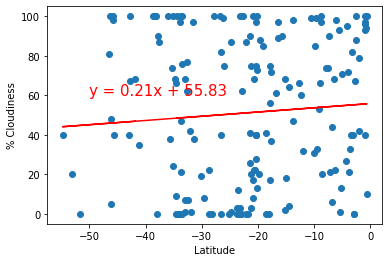

0.0760879727420539
0.3183363461000305


In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

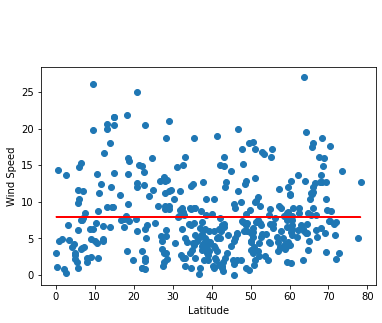

-0.0019059799524963473
0.9701869749045909


In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))